In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#from fattails.metrics import mad # mean absolute deviation

# About

Let's try do a regression with some Cauchy distributed data. I'll try to replicate page 112 Figure 6.12.

# Setup the regression fit methods

In [2]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

def main(x, y):
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b)

# Run a simple regression

Estimated coefficients:
b_0 = 1.2363636363636363 nb_1 = 1.1696969696969697


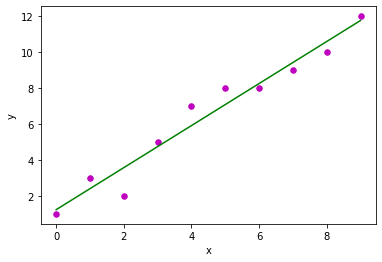

In [3]:
# observations 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

main(x,y)

# Try run a cauchy regression
I'm not sure how it's done in the book.

First I'll try normal x and cauchy y

In [38]:
np.random.seed(0)

In [39]:
y = np.random.standard_cauchy(1*10**3)

In [40]:
x = np.random.standard_normal(1*10**3)

In [41]:
#import pandas as pd
#x = pd.Series(x_values)
#y = pd.Series(y_values)

Estimated coefficients:
b_0 = -1.5299419517457213 nb_1 = -1.3547712605964688


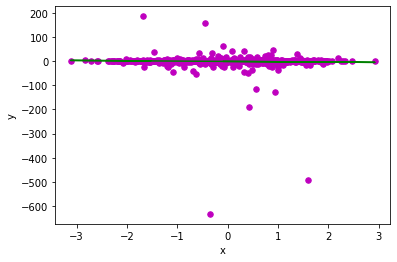

In [42]:
main(x,y)

Estimated coefficients:
b_0 = -0.053448276873663526 nb_1 = -0.0015197904744139166


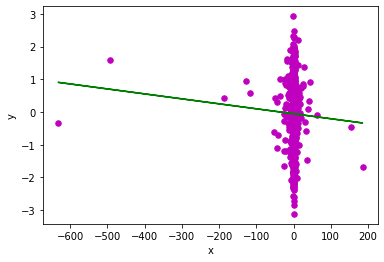

In [43]:
main(y,x)

# Second Attempt
So it looks like what I should do is apply cauchy errors.

`y = mx+c+epsilon` where x is normal and epsilon is cauchy.

In [71]:
np.random.seed(0)

In [72]:
epsilon = np.random.standard_cauchy(1*10**3)
x = np.random.standard_normal(1*10**3)

y = 1000*x + 0 + epsilon

Estimated coefficients:
b_0 = -1.5299419517457338 nb_1 = 998.6452287394034


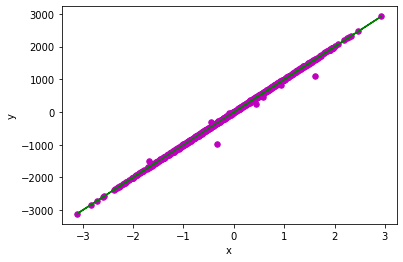

In [73]:
main(x,y)

# Recap

The plot above is something similar to the cauchy regression Figure 6.12 in the book.

# Further Thinking
* So why is it bad to do this cauchy regression? (~because cauchy sample behaviour isn't reliable)

### Calculate R Squared

First calculate the R Squared for the true relationship: `y = 1000*x+0+epsilon`

In [61]:
SSres = np.sum(epsilon**2) # sum of squared residuals

In [62]:
y_bar = np.mean(y)
SStot = np.sum((y-y_bar)**2) # Total sum of squares

In [76]:
R2 = 1-SSres/SStot
1-R2
print(f"Sample R Squared is: {R2}")

Sample R Squared is: 0.9991046090344023


### Try fit a line

We know that `y=100*x+0+epsilon`, but lets try fit a regression to this particular sample.

These values are printed above the plot, we get:
* c = -1.52 # intercept
* m = 998.64 # slope

# Conclusion
So it's not too hard to find the true slope and intercept (just trying one sample I stumbled on good estimates).

What's the problem then?:
* I think the problem is that true R^2 is zero for this cauchy regression.
* Basically the expected errror is undefined / infinite.
    * When I use the same seed for 10 million datapoints there's a tail event up at 2 million 
    * This is way way further away than any other point.
    * If you're using this as a forecast model you'd be exposed to massive error.
    
What's surprising?:
* It's surprising to me that I can still approximate the slope and intercept from sample data. 
    * The problem is not these parameters it seems but rather that expected error is undefined.
* It's less surprising but notable that R^2 for this sample is near 1 while the true R^2 is zero.
    * If I extend this seed to size 10 million I get close to true R^2; the particular sample gives r^2 is near 0.02.
    * Removing a the single tail stand out event though, moves from R^2 near 0.02 to R^2 near 0.5!